# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [86]:
import numpy as np
from math import *

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño
shape=datos.shape
size=datos.size
print('Forma:')
print(shape)
print('\nTamaño:')
print(size)
print('\nColumna 1:')
print(datos[:,0])
print('\nColumna 2:')
print(datos[:,1])
print('\nColumna 3:')
print(datos[:,2])
print('\nColumna 4:')
print(datos[:,3])
print('\nColumna 5:')
print(datos[:,4])
print('\nColumna 6:')
print(datos[:,5])
print('\nColumna 7:')
print(datos[:,6])
R=np.random.randn(10000);
print (R)

Forma:
(5298, 7)

Tamaño:
37086

Columna 1:
[1.43318972 3.05953348 1.57848745 ... 4.79977225 5.45884546 4.23992507]

Columna 2:
[0.55800856 2.22205699 0.76497844 ... 4.00696032 4.47140036 3.45563476]

Columna 3:
[0.23628573 1.78027236 0.51246246 ... 3.57323265 4.05807828 3.01565666]

Columna 4:
[-0.10671427  1.42027236  0.19746246 ...  3.21823265  3.66407828
  2.66465666]

Columna 5:
[3.7514 3.7411 3.7681 ... 3.7436 3.7208 3.7461]

Columna 6:
[1.263 0.972 1.227 ... 0.986 0.926 1.002]

Columna 7:
[2.92588428 3.02311363 2.83983097 ... 7.2987171  6.15482424 6.01632559]
[-0.22023905 -0.77130099  0.28362737 ... -0.36903318 -0.73681486
  0.11022931]


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

(array([1.000e+00, 1.300e+01, 3.343e+03, 1.149e+03, 3.000e+00, 1.800e+01,
        2.300e+01, 3.700e+01, 6.200e+01, 9.500e+01, 1.190e+02, 1.260e+02,
        1.000e+02, 7.400e+01, 5.700e+01, 4.100e+01, 2.100e+01, 6.000e+00,
        7.000e+00, 3.000e+00]),
 array([1.99578392, 2.35116067, 2.70653742, 3.06191417, 3.41729092,
        3.77266767, 4.12804442, 4.48342117, 4.83879792, 5.19417467,
        5.54955142, 5.90492817, 6.26030492, 6.61568167, 6.97105842,
        7.32643517, 7.68181192, 8.03718867, 8.39256542, 8.74794217,
        9.10331892]),
 <a list of 20 Patch objects>)

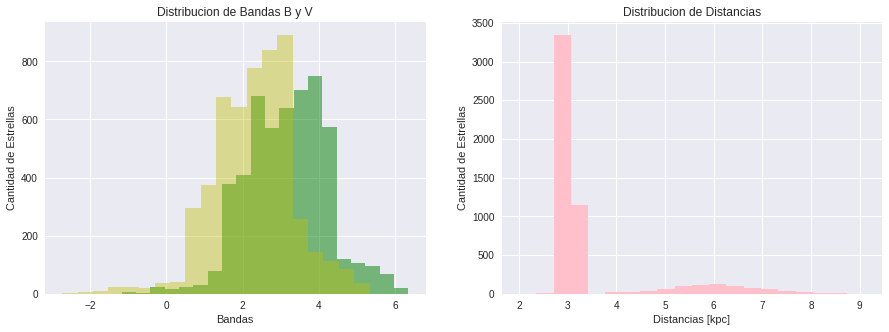

In [118]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

#Primero se crean los arreglos:
bandas_B=datos[:,0]
bandas_V=datos[:,1]
distancias=datos[:,6]

#Clacular promedio y desviación estandar de cada arreglo:
prom_B=bandas_B.mean()
sigma_B=bandas_B.std()

prom_V=bandas_V.mean()
sigma_V=bandas_V.std()

prom_distancias=distancias.mean()
sigma_distancias=distancias.std()
#prom_distancias+sigma_distancias*R
#prom_V+sigma_V*R
#Se crea la figura con dos columnas
fig, ax = plt.subplots(figsize=(15,5), ncols=2)
#R=np.random.randn(10000);

#Se rellena la figura con los histogramas:
ax[0].set_title('Distribucion de Bandas B y V')
ax[0].set_xlabel('Bandas')
ax[0].set_ylabel('Cantidad de Estrellas')
#ax[0].text(-1, 1400, r'$\mu=100,\ \sigma=15$')
ax[0].hist(bandas_B, 20, facecolor='g', alpha=0.5)
ax[0].hist(bandas_V, 20, facecolor='y', alpha=0.4)


ax[1].set_title('Distribucion de Distancias')
ax[1].set_xlabel('Distancias [kpc]')
ax[1].set_ylabel('Cantidad de Estrellas')
ax[1].hist(distancias, 20, facecolor='pink', alpha=1)







## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [120]:
#Filtrar por distancia
datos_filtrados = datos.copy()
datos_filtrados = datos_filtrados[datos_filtrados[:,6]<4]

#Guardar en variables la forma inicial y final del arreglo
Forma_inicial = datos.shape
Forma_final = datos_filtrados.shape

#Extraer la cantidad de filas (estrellas) del arreglo inicial y final

estrellas_iniciales = Forma_inicial[0]
estrellas_finales = Forma_final[0]


print('El set original contenía '+str(estrellas_iniciales)+' estrellas, luego de filtrar quedaron '+str(estrellas_finales)) 

El set original contenía 5298 estrellas, luego de filtrar quedaron 4520


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [77]:
#Funcion mag_abs(mag, dist)



array([-11.77327717, -10.18021536, -11.50148402, ..., -10.30927233,
        -9.47467792, -10.44102189])

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

In [0]:
#Crear arrays MV y color

MV=
    
color=

#plot cmd



## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

In [0]:
# plot cmd + masa / smd + temp

In [0]:
# plot cmd hist2D